In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD, RSI
from datetime import datetime, timedelta, date
from IPython.display import display, HTML
%matplotlib inline

In [2]:
start_day_to_analyze = '2020-02-10'
end_day_to_analyze = '2020-02-11'

In [3]:
base_url = "https://api.alpaca.markets"
api_key_id = "AKVKN4TLUUS5MZO5KYLM"
api_secret = "nkK2UmvE1kTFFw1ZlaqDmwCyiuCu7OOeB5y2La/X"

In [4]:
db_conn = create_engine("postgresql://momentum@localhost:5432/tradedb")

In [5]:
api = tradeapi.REST(
    base_url=base_url, key_id=api_key_id, secret_key=api_secret
)
session = requests.session()

In [6]:
query = f'''
SELECT * 
FROM 
trades as t
WHERE 
    buy_time >= '{start_day_to_analyze}' and 
    buy_time < '{end_day_to_analyze}' 
ORDER BY symbol, buy_time
'''

In [7]:
trades =  pd.read_sql_query(query, db_conn)

In [8]:
trade_details = {}

for index, row in trades.iterrows():
    algo_run_id = row['algo_run_id']
    symbol = row['symbol']
    buy_time = row['client_buy_time']
    buy_price = row['buy_price']
    sell_time = row['client_sell_time']
    sell_price = row['sell_price']
    buy_indicator = row['buy_indicators']
    sell_indicator = row['sell_indicators']
    qty = row['qty']    
    if algo_run_id not in trade_details:
        trade_details[algo_run_id] = {}
    if symbol not in trade_details[algo_run_id]:
        trade_details[algo_run_id][symbol] = []
    trade_details[algo_run_id][symbol].append((buy_time, buy_price, sell_time, sell_price, buy_indicator, sell_indicator, qty))

In [10]:
runs = trades['algo_run_id'].value_counts()

symbols = {}
for run_id, count in runs.items():
    symbols[run_id] = trades['symbol'].value_counts()

ValueError: Array conditional must be same shape as self

In [10]:
revenues = []
precentages = []
symbol_name = []
counts = []
for symbol, count in symbols.items():
    revnue = 0
    precentage = 0.0
    
    for trade in trade_details[symbol]:
        delta = trade[6] * (trade[3] - trade[1])
        precentage += 100.0 * delta / (trade[6] * trade[1])
        revnue += delta
        
    revenues.append(revnue)
    precentages.append(precentage)
    counts.append(count)
    symbol_name.append(symbol)
    

d = {
    'symbol': symbol_name,
    'count': counts,
    'revenue': revenues,
    '%': precentages
}
how_was_my_day = pd.DataFrame(data=d)


In [11]:
display(HTML(how_was_my_day.round(2).to_html()))
print(f'TOTAL REVENUE: {pd.Series(revenues).round(2).sum()} $')

,symbol,count,revenue,%
0,OCUL,1,-24.39,-0.57
1,TRIL,1,-19.14,-0.75
2,SGBX,1,18.94,0.34
3,SOXS,1,-28.20,-0.31
4,PXLW,1,-39.68,-1.75
5,SOLY,1,2.48,0.08
6,ANGI,1,-43.51,-2.21
7,NOK,1,-44.70,-0.68
8,GRWG,1,-108.22,-1.25
9,ERIC,1,192.50,1.61


TOTAL REVENUE: -351.37 $


In [12]:
minute_history = {}
for symbol, count in symbols.items():
    minute_history[symbol] = api.polygon.historic_agg_v2(
        symbol, 
        1, 
        'minute', 
        _from = start_day_to_analyze, 
        to=end_day_to_analyze, 
        limit=5000).df

OCUL analysis


/Users/amichayoren/venv/algo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


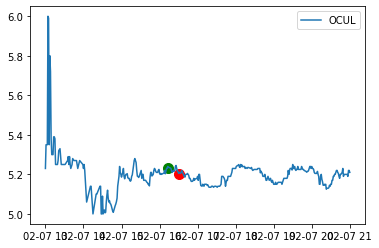

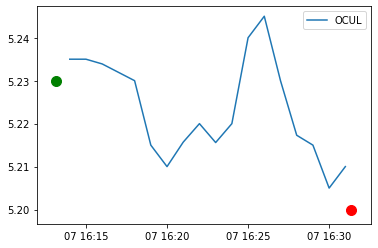

Delta = -0.03000000000000025


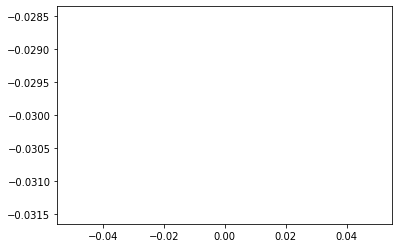

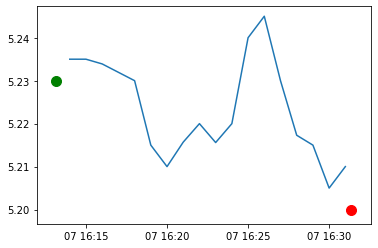

buy time:2020-02-07T16:13:10.242327942Z sell time:2020-02-07T16:31:22.197220755Z
{'rsi': 61.46720633397189, 'macd1': [0.005514091874954552, 0.004652023553048501, 0.005104226166334769, 0.0063735675167295724, 0.008085176067417876], 'macd2': [0.019244606982947943, 0.018738694427210767, 0.018479974087961537, 0.018407508915245785, 0.018469735065553827], 'macd_signal': [0.0060193759934959274, 0.005745905505406442, 0.005617569637592108, 0.0057687692134196005, 0.006232050584219256]}
{'rsi': 43.70560893748671, 'macd': [0.0035263573491146616, 0.002723437708605836, 0.0019429362003053896, 0.0007900397496776179, -0.00011858137743114838], 'too_close': 1, 'macd_signal': [0.0032957703587132873, 0.003181303828691797, 0.0029336303030145154, 0.002504912192347136, 0.001980213478391479], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0020987948558226274}
TRIL analysis


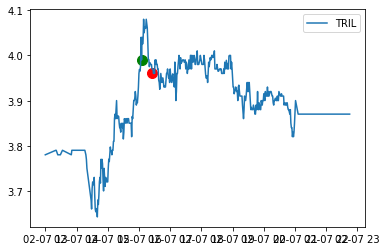

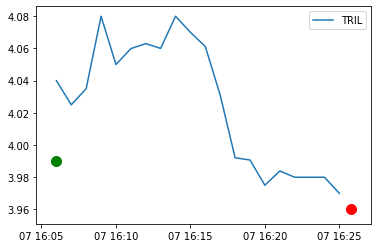

Delta = -0.03000000000000025


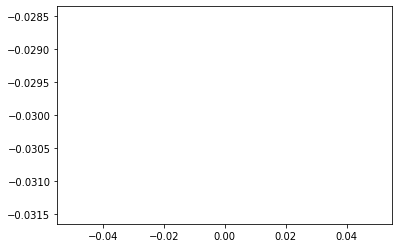

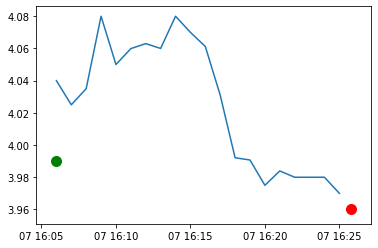

buy time:2020-02-07T16:05:59.708320806Z sell time:2020-02-07T16:25:48.156934425Z
{'rsi': 65.11624099625284, 'macd1': [0.02597778827563957, 0.027879362791779272, 0.029849207637281605, 0.03623755664572581, 0.03684110579313149], 'macd2': [0.020172192606217276, 0.020988153064005477, 0.02186523119319972, 0.023676784911913717, 0.024505924442946636], 'macd_signal': [0.019562495827704945, 0.021225869220519812, 0.022950536903872172, 0.0256079408522429, 0.02785457384042062]}
{'rsi': 42.282977375830534, 'macd': [0.008595537669435771, 0.006023709335621241, 0.0039414572659532965, 0.002267735428991724, -0.00010487555343274835], 'too_close': 1, 'macd_signal': [0.018591662691142548, 0.016078072020038286, 0.013650749069221289, 0.011374146341175376, 0.00907834196225375], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0091832175156865}
SGBX analysis


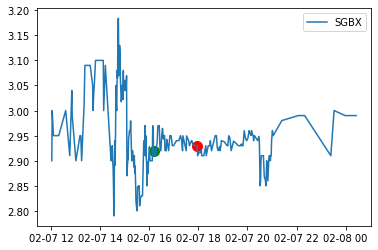

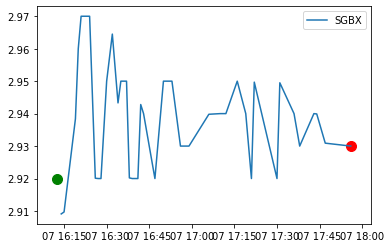

Delta = 0.010000000000000231


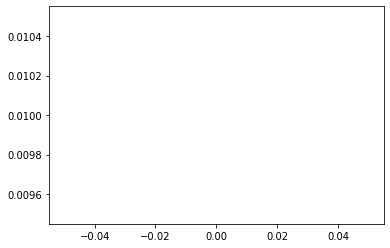

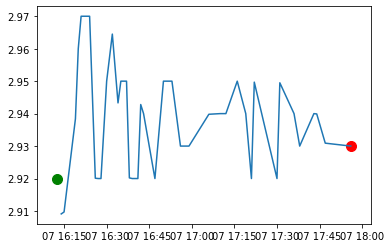

buy time:2020-02-07T16:12:21.062549125Z sell time:2020-02-07T17:56:09.340921668Z
{'rsi': 54.108079924528255, 'macd1': [0.004140110113691531, 0.0039021871939648456, 0.00923142493840734, 0.012934600664812113, 0.013462905286185212], 'macd2': [-0.0013627902387138846, -0.001285453191452568, -9.749063307040728e-05, 0.000922058271116466, 0.0014123796607403705], 'macd_signal': [0.0027910181946399354, 0.0030132519945049174, 0.004256886583285402, 0.005992429399590745, 0.007486524576909638]}
{'rsi': 48.34183180955806, 'macd': [0.00046481903139161673, 0.000581587677835671, 0.0006598283415866213, 0.00024469342578736786, -0.0001287194102350675], 'too_close': 1, 'macd_signal': [0.001085171782211681, 0.000984454961336479, 0.0009195296373865075, 0.0007845623950666796, 0.0006019060340063302], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0007306254442413977}
SOXS analysis


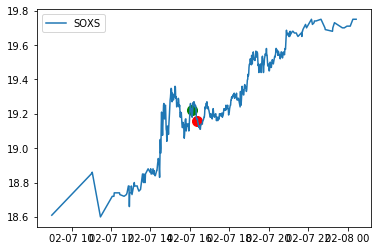

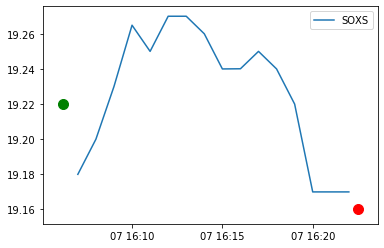

Delta = -0.05999999999999872


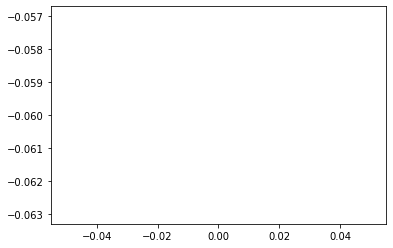

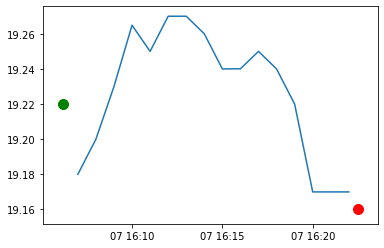

buy time:2020-02-07T16:06:09.452799807Z sell time:2020-02-07T16:22:29.61524028Z
{'rsi': 56.95976280719336, 'macd1': [0.010336999786321854, 0.01381928659847631, 0.01639008923935492, 0.016622027613383494, 0.01741204169430688], 'macd2': [0.018422736756257052, 0.018834769858752765, 0.019183729910494662, 0.01915423057399579, 0.0192563917512949], 'macd_signal': [-0.007408330629365632, -0.003162807183797243, 0.0007477721008331906, 0.003922623203343252, 0.006620506901535978]}
{'rsi': 40.513138460878054, 'macd': [0.012769276010185848, 0.010700672279359225, 0.0063524009010613725, 0.002881638776397466, -0.00012001533082539595], 'too_close': 1, 'macd_signal': [0.013436859598709588, 0.012889622134839514, 0.011582177888083887, 0.009842070065746602, 0.007849652986432202], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007969668317257598}
PXLW analysis


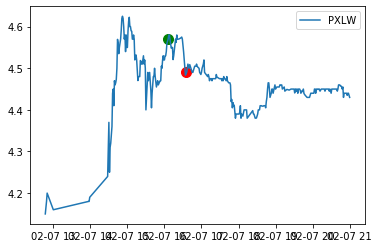

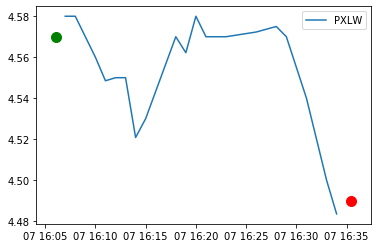

Delta = -0.08000000000000007


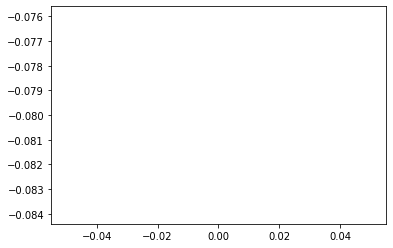

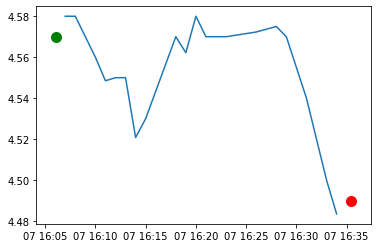

buy time:2020-02-07T16:06:05.552309193Z sell time:2020-02-07T16:35:28.04190892Z
{'rsi': 65.98261079845939, 'macd1': [0.009564359857015425, 0.010890325598398753, 0.01260280216958698, 0.015396306011177252, 0.018207212941070416], 'macd2': [0.012670412311764245, 0.012862671226474554, 0.013178919558279212, 0.013768672350461308, 0.014449178742068192], 'macd_signal': [0.0016384042256349894, 0.0034887885001877424, 0.00531159123406759, 0.007328534189489522, 0.009504269939805701]}
{'rsi': 34.689495334037304, 'macd': [0.008308401650920061, 0.006304818207406804, 0.003622742560416725, 0.0004468038411982178, -0.0025532367691170066], 'too_close': 1, 'macd_signal': [0.008944549007829258, 0.008416602847744767, 0.0074578307902791584, 0.00605562540046297, 0.004333852966546975], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006887089735663982}
SOLY analysis


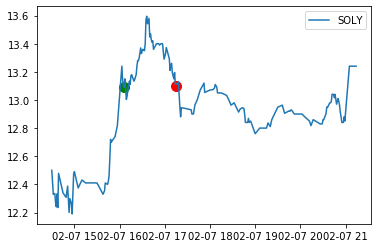

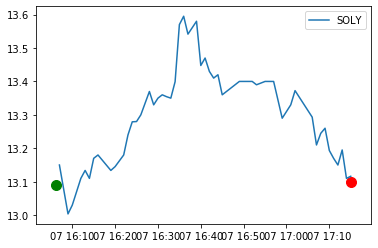

Delta = 0.009999999999999787


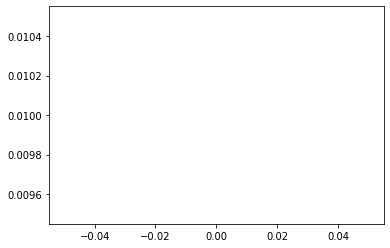

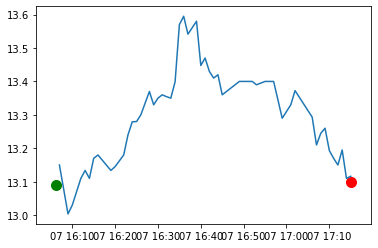

buy time:2020-02-07T16:06:18.307949785Z sell time:2020-02-07T17:15:05.197395447Z
{'rsi': 71.17501020319965, 'macd1': [0.09565606011286754, 0.14086942050908036, 0.16696570662566756, 0.18206261789506684, 0.1910181738138821], 'macd2': [0.049608847688622504, 0.06070492883105594, 0.06926840863650163, 0.07634537520898732, 0.08257437104363419], 'macd_signal': [0.05078455093925251, 0.06880152485321808, 0.08843436120770798, 0.10716001254517975, 0.12393164479892022]}
{'rsi': 34.97102640336195, 'macd': [-0.02305544682945282, -0.02788301077957911, -0.028944969561761624, -0.03381214563149193, -0.03768511210619785], 'too_close': 0, 'macd_signal': [-0.0035737141712394995, -0.008435573492907422, -0.012537452706678262, -0.016792391291640996, -0.020970935454552368], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.01671417665164548}
ANGI analysis


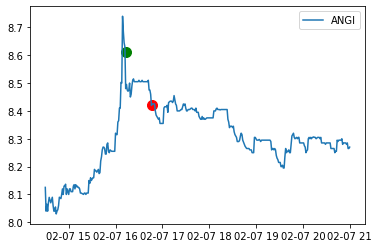

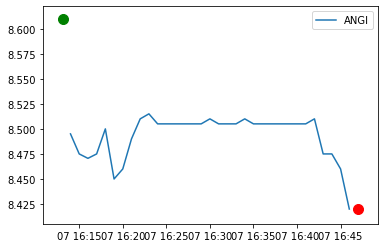

Delta = -0.1899999999999995


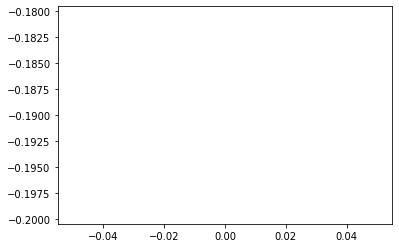

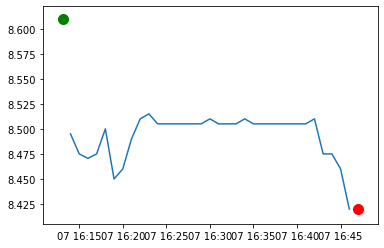

buy time:2020-02-07T16:13:05.745123964Z sell time:2020-02-07T16:46:57.300937896Z
{'rsi': 74.90417981749104, 'macd1': [0.06440062600088048, 0.08831178663267458, 0.10165173542815253, 0.10775395473596916, 0.11011034929638441], 'macd2': [0.036792391913412104, 0.042989211085082246, 0.04774207956555898, 0.05139876971162671, 0.05444093242544312], 'macd_signal': [0.04506389905130439, 0.053713476567578425, 0.06330112833969324, 0.07219169361894842, 0.07977542475443562]}
{'rsi': 30.321466984327177, 'macd': [0.005189703044859328, 0.003142081587055756, 0.0015057261447797288, -0.000568131682250339, -0.004254668538608897], 'too_close': 1, 'macd_signal': [0.007617364617790376, 0.006722308011643452, 0.005678991638270707, 0.004429566974166498, 0.002692719871611419], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006947388410220316}
NOK analysis


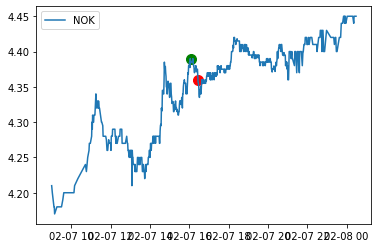

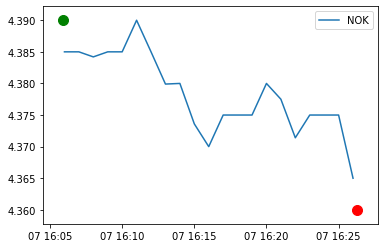

Delta = -0.02999999999999936


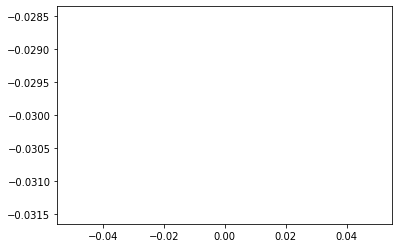

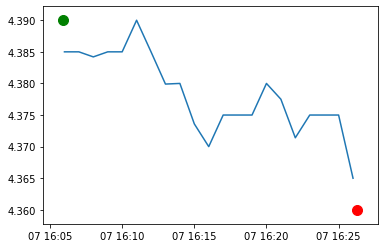

buy time:2020-02-07T16:05:52.554334892Z sell time:2020-02-07T16:26:18.313589612Z
{'rsi': 67.25171630055907, 'macd1': [0.011775650764467294, 0.011664445064094586, 0.012449518147117367, 0.012523868646384884, 0.012838258711094674], 'macd2': [0.009377070781834362, 0.009529419091014901, 0.00985586282674511, 0.010060470417552203, 0.01031259364217263], 'macd_signal': [0.009109196741445499, 0.009620246405975317, 0.010186100754203727, 0.01065365433263996, 0.011090575208330903]}
{'rsi': 41.241177587534004, 'macd': [0.0010082201035856997, 0.0008181721162054956, 0.0006594571634908064, 0.0005272187956153473, -0.000102151605269718], 'too_close': 1, 'macd_signal': [0.0024309946542874577, 0.002108430146671065, 0.0018186355500350135, 0.0015603521991510803, 0.0012278514382669207], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0013300030435366387}
GRWG analysis


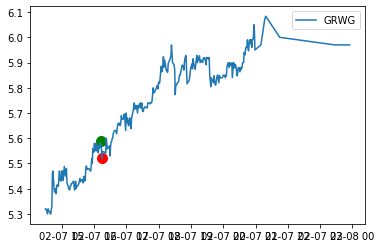

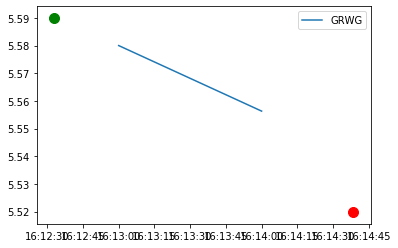

Delta = -0.07000000000000028


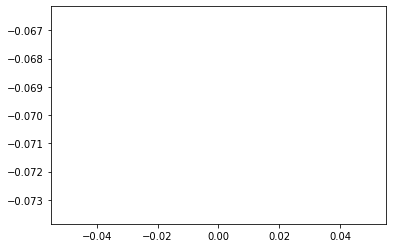

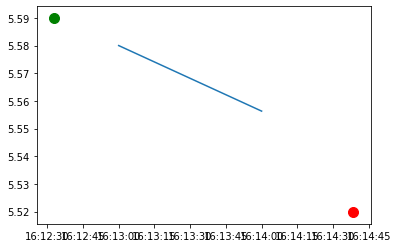

buy time:2020-02-07T16:12:32.909498114Z sell time:2020-02-07T16:14:38.237828543Z
{'rsi': 64.01795082146523, 'macd1': [0.028848687460472533, 0.02770009716482491, 0.026484533860088533, 0.026825792993300013, 0.027585175015123475], 'macd2': [0.02632479523517528, 0.026477912114105884, 0.026576436820208826, 0.026944449455739594, 0.02739987499613683], 'macd_signal': [0.02976720341827998, 0.029353782167588965, 0.02877993250608888, 0.028389104603531105, 0.02822831868584958]}
{'rsi': 48.015831348431135, 'macd': [0.015497155659321749, 0.015681535057576745, 0.014842330237287094, 0.014774867646966783, 0.011548599814938498], 'too_close': 1, 'macd_signal': [0.01725706146693245, 0.01694195618506131, 0.01652203099550647, 0.01617259832579853, 0.015247798623626524], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0036991988086880253}
ERIC analysis


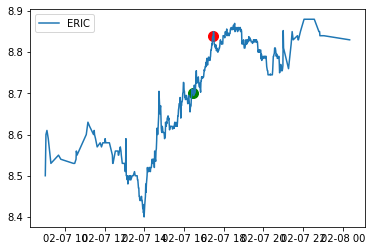

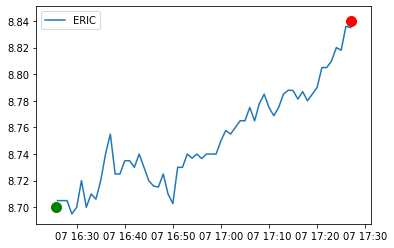

Delta = 0.14000000000000057


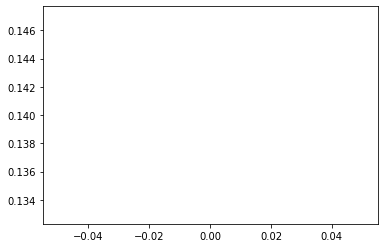

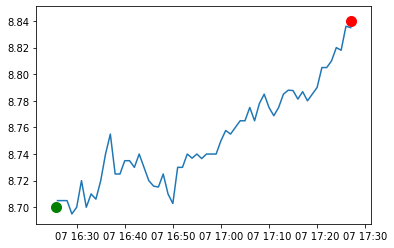

buy time:2020-02-07T16:25:48.017491133Z sell time:2020-02-07T17:27:04.639572611Z
{'rsi': 60.94366479908824, 'macd1': [-0.0021582647579894143, -0.00248885212337413, -0.0011240547358735142, 0.00035690110602359937, 0.0023108476931970046], 'macd2': [0.013924026481776153, 0.013423397132202197, 0.01326120532016617, 0.013170742233091559, 0.013226384563242988], 'macd_signal': [0.0019403106955007457, 0.0010544781317257705, 0.0006187715582059135, 0.0005663974677694507, 0.0009152875128549615]}
{'rsi': 78.3891472069334, 'macd': [0.008253989850274479, 0.008721567426491106, 0.009492126999823824, 0.009865392550473473, 0.011170983985389071], 'too_close': 0, 'macd_signal': [0.007843977191726394, 0.008019495238679336, 0.008314021590908233, 0.00862429578282128, 0.009133633423334838], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0020373505620542333}
CDR analysis


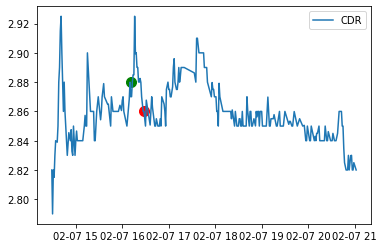

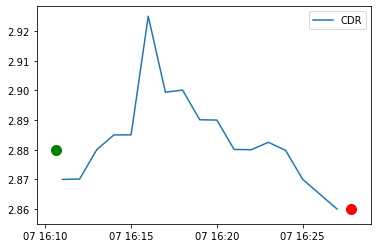

Delta = -0.020000000000000018


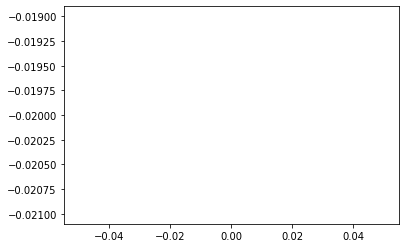

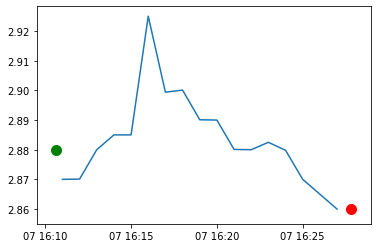

buy time:2020-02-07T16:10:38.626324182Z sell time:2020-02-07T16:27:50.413592822Z
{'rsi': 58.22802563017936, 'macd1': [0.0020563647072355806, 0.0015993409940247005, 0.0004253270763348027, 0.000960497629981294, 0.002302178290189083], 'macd2': [0.005373520034909873, 0.0052163669881446495, 0.004903502282603167, 0.004900497206000942, 0.0050770199288781015], 'macd_signal': [0.001899671464583268, 0.0018396053704715545, 0.0015567497116442041, 0.001437499295311622, 0.0016104350942871143]}
{'rsi': 42.03362069720385, 'macd': [0.0037178363249816826, 0.003135007821931879, 0.002131050445244309, 0.0010613297563288882, -4.5742595505604555e-05], 'too_close': 1, 'macd_signal': [0.00447929310169345, 0.004210436045741136, 0.0037945589256417707, 0.0032479130917791943, 0.0025891819543222344], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.002634924549827839}
KZR analysis


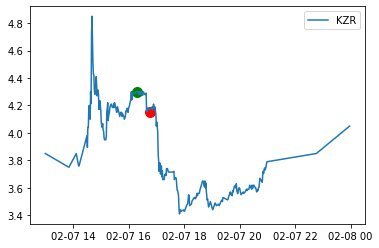

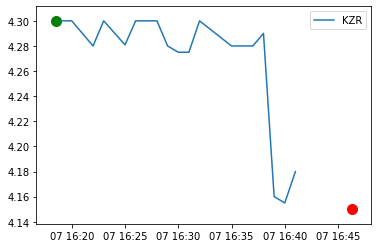

Delta = -0.14999999999999947


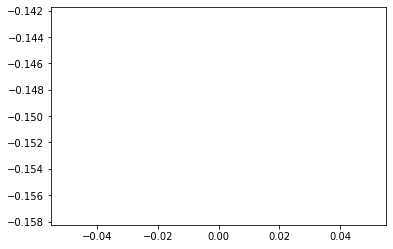

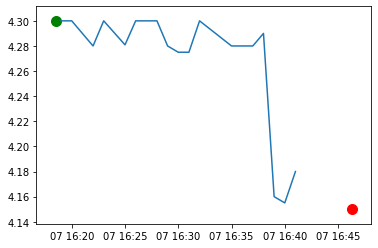

buy time:2020-02-07T16:18:28.62516176Z sell time:2020-02-07T16:46:18.78360803Z
{'rsi': 64.65841556721989, 'macd1': [0.031897620844100416, 0.034712936801453154, 0.03652307965349344, 0.03832278610847162, 0.0392960856260931], 'macd2': [0.02256527226935834, 0.023621163331420725, 0.024554838133690637, 0.025534512810815535, 0.026395005965881957], 'macd_signal': [0.01889797761517097, 0.022060969452427408, 0.024953391492640614, 0.027627270415806815, 0.02996103345786407]}
{'rsi': 32.04609941133379, 'macd': [0.010566069984250248, 0.009400933565247627, 0.008890425530112545, 0.0016239202361099103, -0.00431912181423133], 'too_close': 1, 'macd_signal': [0.014676626208704158, 0.013621487680012851, 0.01267527525003279, 0.010465004247248213, 0.007508179034952304], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.011827300849183636}
SHSP analysis


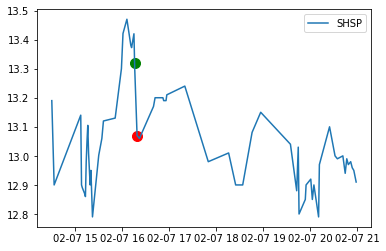

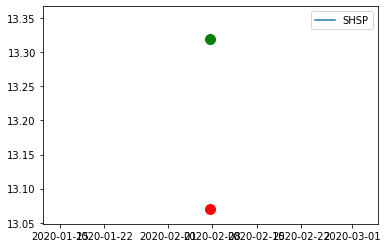

Delta = -0.25


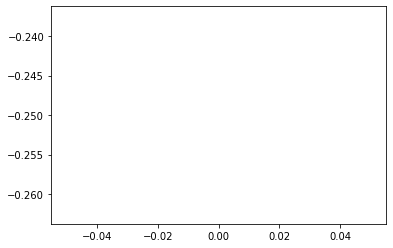

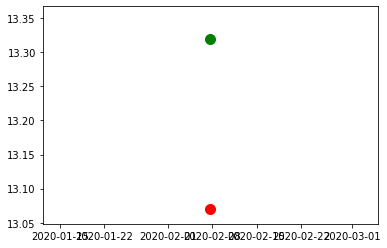

buy time:2020-02-07T16:16:13.543268604Z sell time:2020-02-07T16:19:29.009220017Z
{'rsi': 63.117674747773066, 'macd1': [0.08071137216701452, 0.1033832525215086, 0.1127964550497147, 0.11827179657409559, 0.12501091832027456], 'macd2': [0.01498844574868663, 0.021910588656782082, 0.026806313757504086, 0.03114451375819627, 0.03584728071003873], 'macd_signal': [0.036356469017034675, 0.04976182571792946, 0.06236875158428651, 0.07354936058224833, 0.08384167212985358]}
{'rsi': 47.55147893701575, 'macd': [0.07261731788337755, 0.07569553842646926, 0.07958382016879284, 0.0753463277580213, 0.05911780993458926], 'too_close': 1, 'macd_signal': [0.0409055920845033, 0.04786358135289649, 0.05420762911607576, 0.05843536884446487, 0.05857185706248975], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.000545952872099513}


In [13]:
for symbol in minute_history:
    print (f'{symbol} analysis')
    plt.plot(minute_history[symbol]['close'], label=symbol)


    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
   
    plt.legend()
    plt.show()
    
    min_time = trade_details[symbol][0][0]
    max_time = trade_details[symbol][-1][2]
    delta = 0 
    accumulative_delta = []
    plt.plot(minute_history[symbol]['close'][min_time:max_time], label=symbol)
    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
        trade_delta = trade[3] - trade[1]
        delta += trade_delta 
        accumulative_delta.append(delta)
    plt.legend()
    plt.show()
    
    print(f'Delta = {delta}')
    plt.plot(range(len(accumulative_delta)), accumulative_delta)
    plt.show()
    
    for trade in trade_details[symbol]:
        plt.plot(minute_history[symbol]['close'][trade[0]:trade[2]])
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
        plt.show()
        print(f"buy time:{trade[0]} sell time:{trade[2]}")
        print(trade[4])
        print(trade[5])
    